In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.layers import Dense, Input, Concatenate
from keras.models import Model
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
!curl -O https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 58.1M    0 45681    0     0  26896      0  0:37:47  0:00:01  0:37:46 26886
  6 58.1M    6 3902k    0     0  1297k      0  0:00:45  0:00:03  0:00:42 1298k
 23 58.1M   23 13.5M    0     0  3652k      0  0:00:16  0:00:03  0:00:13 3651k
 26 58.1M   26 15.5M    0     0  3393k      0  0:00:17  0:00:04  0:00:13 3393k
 38 58.1M   38 22.4M    0     0  4044k      0  0:00:14  0:00:05  0:00:09 5159k
 50 58.1M   50 29.4M    0     0  4520k      0  0:00:13  0:00:06  0:00:07 6052k
 94 58.1M   94 54.8M    0     0  7293k      0  0:00:08  0:00:07  0:00:01 10.8M
100 58.1M  100 58.1M    0     0  7492k      0  0:00:07  0:00:07 --:--:-- 10.7M


In [3]:
!tar -xf UCI-HAR.zip

In [4]:
!dir "UCI HAR Dataset"

 Volume in drive C is Windows
 Volume Serial Number is 0A67-2963

 Directory of c:\Users\zheng\Data\Data_Sci_Projects\My_Data_Sci_Projects\Time Series Learning\6. ANN\UCI HAR Dataset

11/29/2023  07:09 PM    <DIR>          .
11/29/2023  06:54 PM    <DIR>          ..
02/15/2015  10:13 PM             6,148 .DS_Store
10/10/2012  06:55 PM                80 activity_labels.txt
10/11/2012  04:41 PM            15,785 features.txt
10/15/2012  06:44 PM             2,809 features_info.txt
02/15/2015  09:51 PM             6,304 README.txt
11/29/2023  07:09 PM    <DIR>          test
11/29/2023  07:09 PM    <DIR>          train
               5 File(s)         31,126 bytes
               4 Dir(s)  184,164,724,736 bytes free


In [5]:
!dir "UCI HAR Dataset/train"

 Volume in drive C is Windows
 Volume Serial Number is 0A67-2963

 Directory of c:\Users\zheng\Data\Data_Sci_Projects\My_Data_Sci_Projects\Time Series Learning\6. ANN\UCI HAR Dataset\train

11/29/2023  07:09 PM    <DIR>          .
11/29/2023  07:09 PM    <DIR>          ..
11/29/2023  07:09 PM    <DIR>          Inertial Signals
11/29/2012  06:09 PM            20,152 subject_train.txt
11/29/2012  06:25 PM        66,006,256 X_train.txt
11/29/2012  06:09 PM            14,704 y_train.txt
               3 File(s)     66,041,112 bytes
               3 Dir(s)  184,164,724,736 bytes free


In [6]:
!head "UCI HAR Dataset/train/subject_train.txt"

'head' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!findstr /n "." "UCI HAR Dataset\train\subject_train.txt" | findstr "^.:"

1:1
2:1
3:1
4:1
5:1
6:1
7:1
8:1
9:1


In [8]:
!findstr /n "." "UCI HAR Dataset\train\X_train.txt" | findstr "^.:"

1:  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.00

In [9]:
df = pd.read_csv(
    'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',
    header=None,
    delim_whitespace=True
)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB


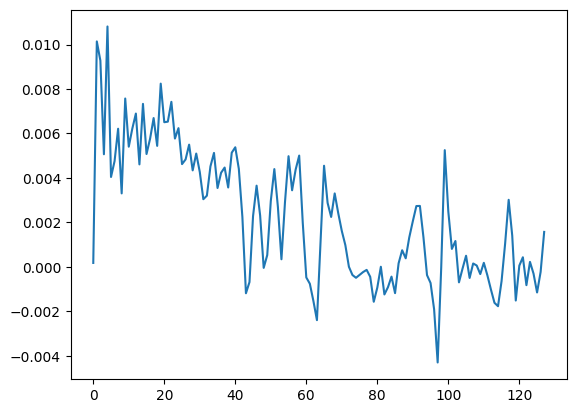

In [11]:
df.iloc[0].plot();

In [26]:
T = 128
Ntrain = 7352
Ntest = 2947
D = 9 # 9 different series
K = 6 # Number of classes

In [37]:
def load_data():
    Xtrain = np.zeros((Ntrain, T, D))
    Xtest = np.zeros((Ntest, T, D))
    
    ts_filenames = [
        'body_acc_x_train.txt', 'body_gyro_x_train.txt', 'total_acc_x_train.txt',
        'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'total_acc_y_train.txt',
        'body_acc_z_train.txt', 'body_gyro_z_train.txt', 'total_acc_z_train.txt',
    ]
    ts_file_prefix = "UCI HAR Dataset/train/"
    
    for d, fn in enumerate(ts_filenames):
        df = pd.read_csv(
            f'{ts_file_prefix}Inertial Signals/{fn}',
            header=None,
            delim_whitespace=True
        )
        
        x = df.to_numpy()
        Xtrain[:,:,d] = x
        
    Ytrain = pd.read_csv(
        f'{ts_file_prefix}y_train.txt', header=None
    ).to_numpy() - 1 # -1 for making labels 0-indexed
    Ytrain = Ytrain.flatten()
    # test data
    ts_filenames = [
        'body_acc_x_test.txt', 'body_gyro_x_test.txt', 'total_acc_x_test.txt',
        'body_acc_y_test.txt', 'body_gyro_y_test.txt', 'total_acc_y_test.txt',
        'body_acc_z_test.txt', 'body_gyro_z_test.txt', 'total_acc_z_test.txt',
    ]

    ts_file_prefix = 'UCI HAR Dataset/test/'

    for d, fn in enumerate(ts_filenames):
        df = pd.read_csv(
            f'{ts_file_prefix}Inertial Signals/{fn}',
            header=None,
            delim_whitespace=True)

        # Ntrain x T array
        x = df.to_numpy()
        Xtest[:, :, d] = x

    # test labels
    Ytest = pd.read_csv(
        f'{ts_file_prefix}y_test.txt', header=None).to_numpy() - 1
    Ytest = Ytest.flatten()

    return Xtrain, Ytrain, Xtest, Ytest

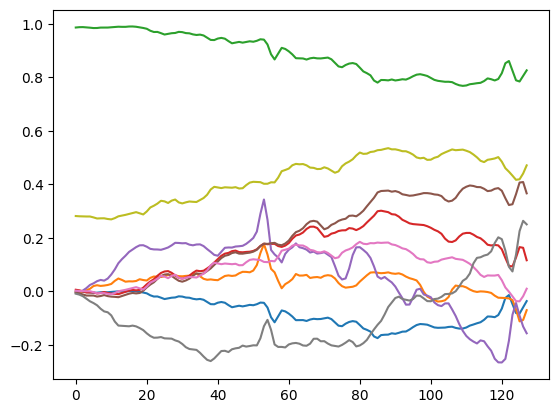

In [38]:
Xtrain, Ytrain, Xtest, Ytest = load_data()
# Plot all D=9 time series of length T=128
plt.plot(Xtrain[7000, :, :]);

In [39]:
# Build model
inputs, features = [], []

for d in range(D):
    i = Input(shape=(T,))
    x = Dense(32, activation='relu')(i)
    x = Dense(16, activation='relu')(x)
    inputs.append(i)
    features.append(x)
    
# Post-concatenation
x = Concatenate()(features)
x = Dense(K)(x)
model = Model(inputs, x)

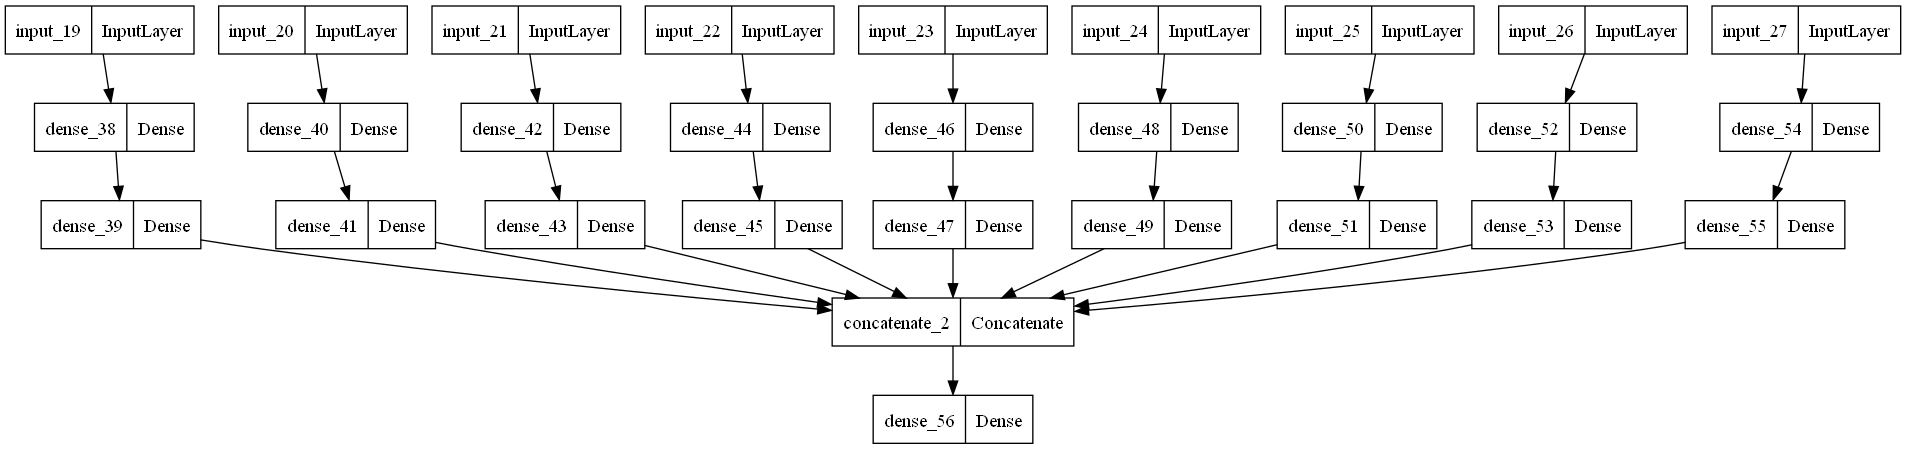

In [40]:
tf.keras.utils.plot_model(model)

In [41]:
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True
)

In [42]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'],
)

In [43]:
Xtrain_split = []
Xtest_split = []
for d in range(D):
    Xtrain_split.append(Xtrain[:, :, d])
    Xtest_split.append(Xtest[:, :, d])

In [44]:
r = model.fit(
    Xtrain_split,
    Ytrain,
    epochs=15,
    callbacks=[checkpoint],
    validation_data=(Xtest_split, Ytest)
)

Epoch 1/15
230/230 [==============================] - 6s 7ms/step - loss: 0.5751 - accuracy: 0.8130 - val_loss: 0.4531 - val_accuracy: 0.8337
Epoch 2/15
 35/230 [===>..........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.9045

c:\aconda\envs\time_series_env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/230 [==============================] - 1s 4ms/step - loss: 0.2399 - accuracy: 0.9161 - val_loss: 0.3739 - val_accuracy: 0.8588
Epoch 3/15
230/230 [==============================] - 1s 5ms/step - loss: 0.1786 - accuracy: 0.9354 - val_loss: 0.3376 - val_accuracy: 0.8748
Epoch 4/15
230/230 [==============================] - 1s 5ms/step - loss: 0.1482 - accuracy: 0.9430 - val_loss: 0.3247 - val_accuracy: 0.8911
Epoch 5/15
230/230 [==============================] - 1s 4ms/step - loss: 0.1278 - accuracy: 0.9561 - val_loss: 0.2891 - val_accuracy: 0.8935
Epoch 6/15
230/230 [==============================] - 2s 10ms/step - loss: 0.1118 - accuracy: 0.9606 - val_loss: 0.2953 - val_accuracy: 0.8870
Epoch 7/15
230/230 [==============================] - 2s 10ms/step - loss: 0.1023 - accuracy: 0.9638 - val_loss: 0.2830 - val_accuracy: 0.9026
Epoch 8/15
230/230 [==============================] - 3s 11ms/step - loss: 0.0973 - accuracy: 0.9660 - val_loss: 0.2726 - val_accuracy: 0.9101
Epoch 9/15
230

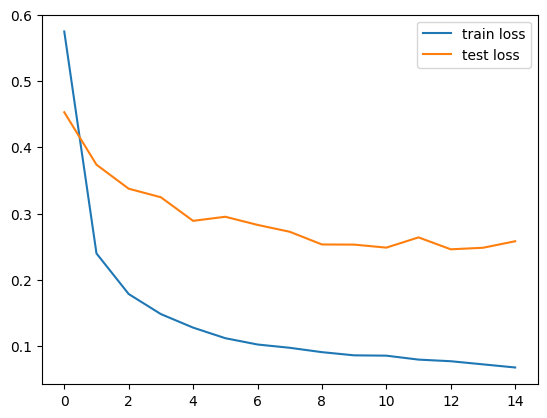

In [45]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

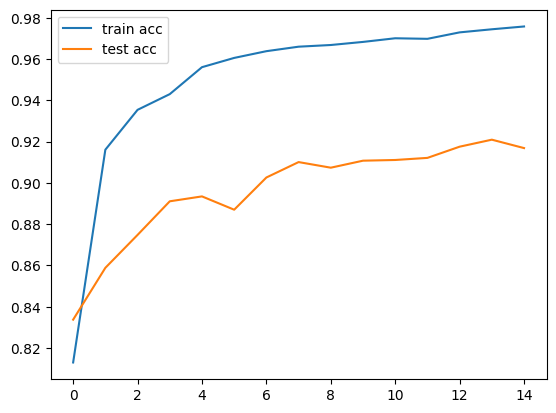

In [46]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [48]:
# load the best model
best_model = tf.keras.models.load_model('best_model.h5')

Ptest = best_model.predict(Xtest_split)
np.mean(np.argmax(Ptest, axis=1) == Ytest)

93/93 [==============================] - 0s 3ms/step


0.9209365456396336

Scale the training data

In [51]:
def load_features():
    df = pd.read_csv(
        "UCI HAR Dataset/train/X_train.txt",
        header=None,
        delim_whitespace=True
    )
    feat_train = df.to_numpy()
    
    df = pd.read_csv(
        "UCI HAR Dataset/test/X_test.txt",
        header=None,
        delim_whitespace=True
    )
    feat_test = df.to_numpy()
    
    scaler = StandardScaler()
    feat_train = scaler.fit_transform(feat_train)
    feat_test = scaler.fit_transform(feat_test)
    return feat_train, feat_test

In [52]:
feat_train, feat_test = load_features()

In [53]:
num_feat = feat_train.shape[1]

In [54]:
# Build model
i = Input(shape=(num_feat,))
x = Dense(32, activation='relu')(i)
x = Dense(K)(x)
model = Model(i, x)

In [55]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'],
)

In [56]:
checkpoint2 = ModelCheckpoint(
    'best_model_basic.h5',
    monitor='val_accuracy',
    save_best_only=True
)

In [59]:
r = model.fit(
  feat_train,
  Ytrain,
  epochs=15,
  callbacks=[checkpoint2],
  validation_data=(feat_test, Ytest),
)

Epoch 1/15
230/230 [==============================] - 1s 4ms/step - loss: 0.3103 - accuracy: 0.8833 - val_loss: 0.1730 - val_accuracy: 0.9406
Epoch 2/15
 83/230 [=========>....................] - ETA: 0s - loss: 0.1190 - accuracy: 0.9631

c:\aconda\envs\time_series_env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/230 [==============================] - 1s 3ms/step - loss: 0.1053 - accuracy: 0.9657 - val_loss: 0.1482 - val_accuracy: 0.9471
Epoch 3/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9739 - val_loss: 0.1362 - val_accuracy: 0.9498
Epoch 4/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9782 - val_loss: 0.1422 - val_accuracy: 0.9450
Epoch 5/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0510 - accuracy: 0.9831 - val_loss: 0.1559 - val_accuracy: 0.9399
Epoch 6/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.9848 - val_loss: 0.1365 - val_accuracy: 0.9491
Epoch 7/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0432 - accuracy: 0.9842 - val_loss: 0.1569 - val_accuracy: 0.9464
Epoch 8/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9854 - val_loss: 0.1684 - val_accuracy: 0.9427
Epoch 9/15
230/23

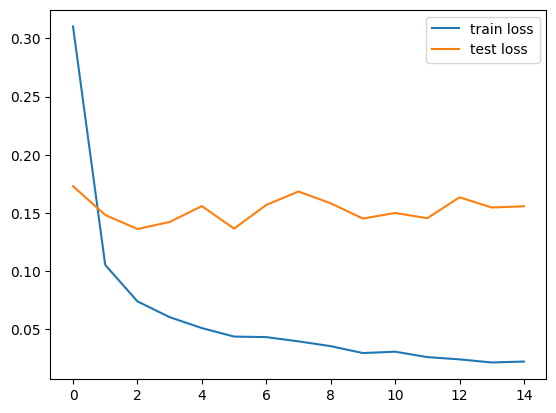

In [62]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

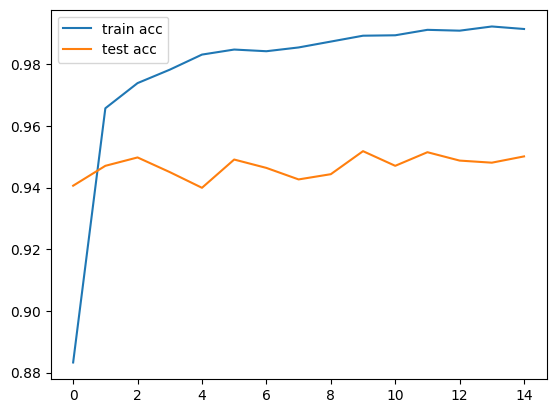

In [63]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [64]:
# load best model
best_model = tf.keras.models.load_model('best_model_basic.h5')
Ptest = best_model.predict(feat_test)

# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

93/93 [==============================] - 0s 2ms/step


0.9518154054971157

Compare to ML models

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [67]:
model = LogisticRegression(
    solver='liblinear',
)
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9945593035908596

In [68]:
model.score(feat_test, Ytest)

0.9643705463182898

In [69]:
model = SVC()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9866702937976061

In [70]:
model.score(feat_test, Ytest)

0.9565659993213438

In [71]:
model = LinearSVC()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

c:\aconda\envs\time_series_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\aconda\envs\time_series_env\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9978237214363439

In [73]:
model.score(feat_test, Ytest)

0.9579233118425518

In [74]:
model = RandomForestClassifier()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

1.0

In [75]:
model.score(feat_test, Ytest)

0.9168646080760094

Build a hybrid model

In [78]:
# Combined Model
inputs = []
features = []

# make a neural network for each of the D time series
for d in range(D):
    i = Input(shape=(T,))
    x = Dense(32, activation='relu')(i)
    x = Dense(16, activation='relu')(x)
    inputs.append(i)
    features.append(x)

# Addtional layer with scaled features
i2 = Input(shape=(num_feat,))
x2 = Dense(32, activation='relu')(i2)

# output of concatenate will be D * (size of individual ANN output)
x = Concatenate()(features + [x2])
x = Dense(K)(x)
model = Model(inputs + [i2], x)

In [79]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'],
)

In [80]:
check_point3 = ModelCheckpoint(
    'best_model_combined.h5', monitor='val_accuracy', save_best_only=True
)

In [81]:
r = model.fit(
    Xtrain_split + [feat_train],
    Ytrain,
    epochs=15,
    callbacks=[check_point3],
    validation_data=(Xtest_split + [feat_test], Ytest),
)

Epoch 1/15
230/230 [==============================] - 6s 7ms/step - loss: 0.2896 - accuracy: 0.8974 - val_loss: 0.2328 - val_accuracy: 0.9091
Epoch 2/15
 15/230 [>.............................] - ETA: 0s - loss: 0.1204 - accuracy: 0.9646

c:\aconda\envs\time_series_env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/230 [==============================] - 1s 5ms/step - loss: 0.0941 - accuracy: 0.9678 - val_loss: 0.1800 - val_accuracy: 0.9382
Epoch 3/15
230/230 [==============================] - 2s 9ms/step - loss: 0.0694 - accuracy: 0.9752 - val_loss: 0.1609 - val_accuracy: 0.9464
Epoch 4/15
230/230 [==============================] - 2s 8ms/step - loss: 0.0557 - accuracy: 0.9795 - val_loss: 0.1832 - val_accuracy: 0.9386
Epoch 5/15
230/230 [==============================] - 2s 10ms/step - loss: 0.0486 - accuracy: 0.9818 - val_loss: 0.1413 - val_accuracy: 0.9474
Epoch 6/15
230/230 [==============================] - 2s 10ms/step - loss: 0.0393 - accuracy: 0.9871 - val_loss: 0.1600 - val_accuracy: 0.9488
Epoch 7/15
230/230 [==============================] - 2s 8ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.1676 - val_accuracy: 0.9505
Epoch 8/15
230/230 [==============================] - 1s 5ms/step - loss: 0.0328 - accuracy: 0.9893 - val_loss: 0.1666 - val_accuracy: 0.9474
Epoch 9/15
230/

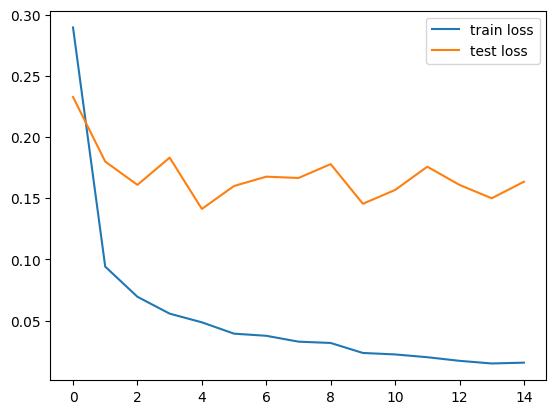

In [82]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

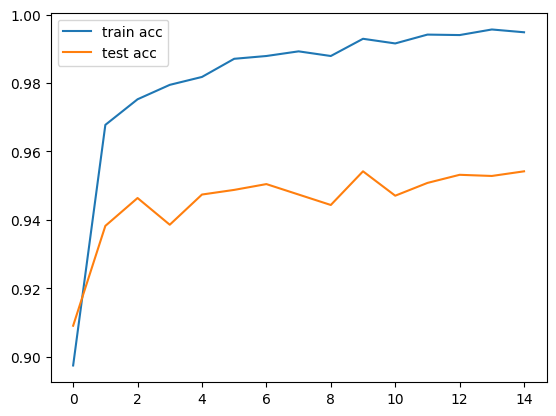

In [83]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [84]:
# load best model
best_model = tf.keras.models.load_model('best_model_combined.h5')

In [85]:
Ptest = best_model.predict(Xtest_split + [feat_test])
np.mean(np.argmax(Ptest, axis=1) == Ytest)

93/93 [==============================] - 0s 2ms/step


0.9541907024092298